In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import gsw as sw
import scipy.stats as ss
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

In [2]:
# import cruise data

in_file = '../data/KuroAlldata.csv'
data = pd.read_csv(in_file, sep = ',')

in_file = '../data/data_CHL.csv'
chl = pd.read_csv(in_file, sep = ',')

print chl.columns

Index([u'Unnamed: 0', u'station', u'lat', u'lon', u'bottle', u'depth (m)',
       u'fluorescence', u'CHL', u'T(C)', u'theta', u'S', u'sigma_t',
       u'sample'],
      dtype='object')


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


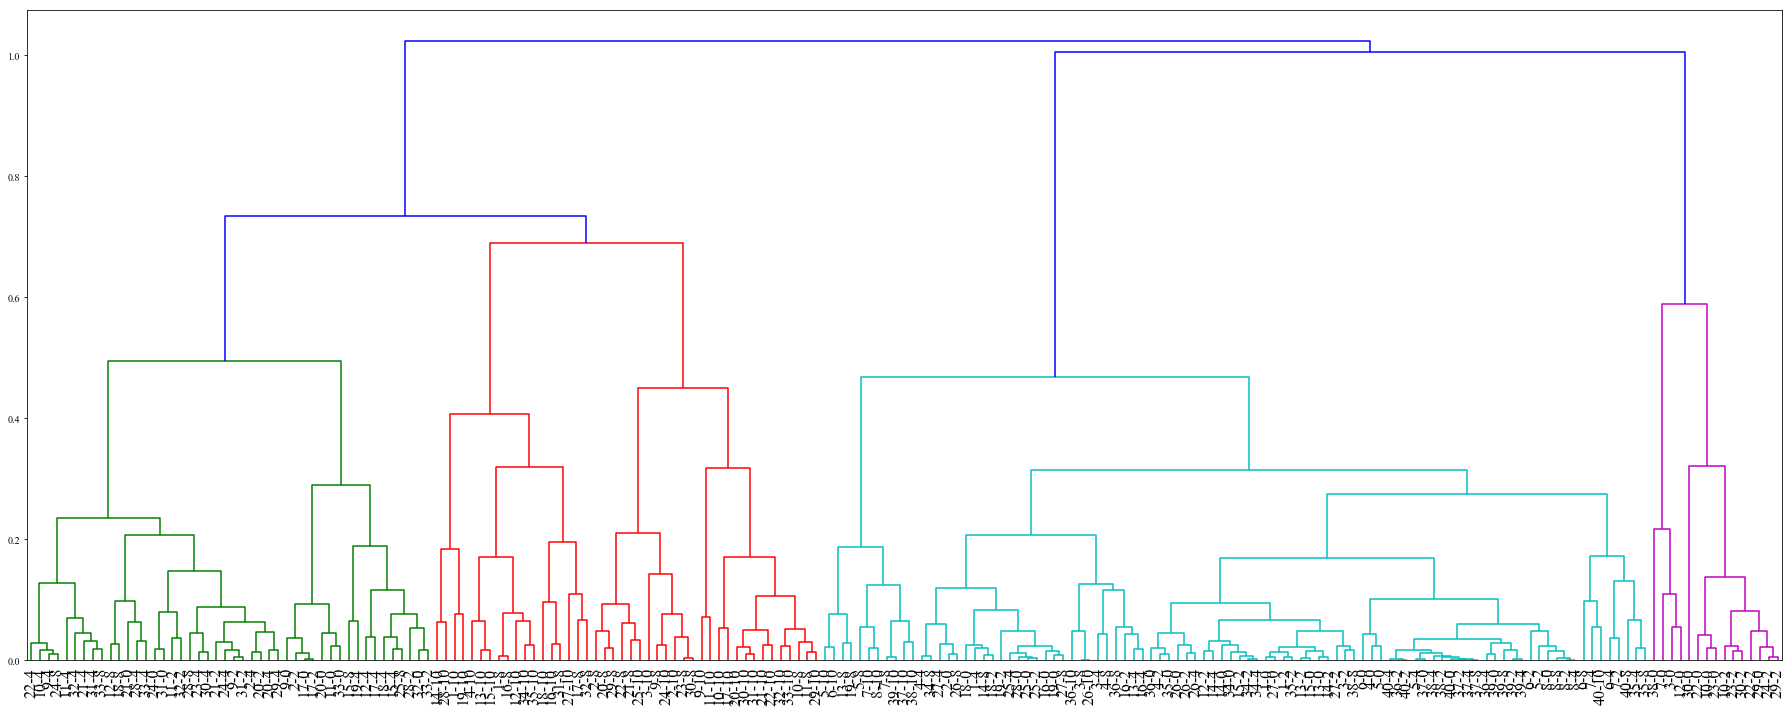

In [3]:
sub = chl[['sample', 'theta', 'S']].dropna()
sub = sub.set_index('sample')
del sub.index.name

# normalise data
sub_norm = (sub - sub.mean()) / (sub.max() - sub.min()) 
# dist = pdist(sub_norm, 'euclidean')

Z = linkage(sub_norm, 'complete')

fig1 = plt.figure(figsize=(25, 10))
dendrogram(Z,leaf_rotation=90.,leaf_font_size=16.,labels=sub_norm.index)

# fig1.savefig('../figures/TS_dendrogram_ward.png', dpi = 300)

In [4]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.65
clusters = fcluster(Z, max_d, criterion='distance')
clusters

sub['cluster'] = clusters

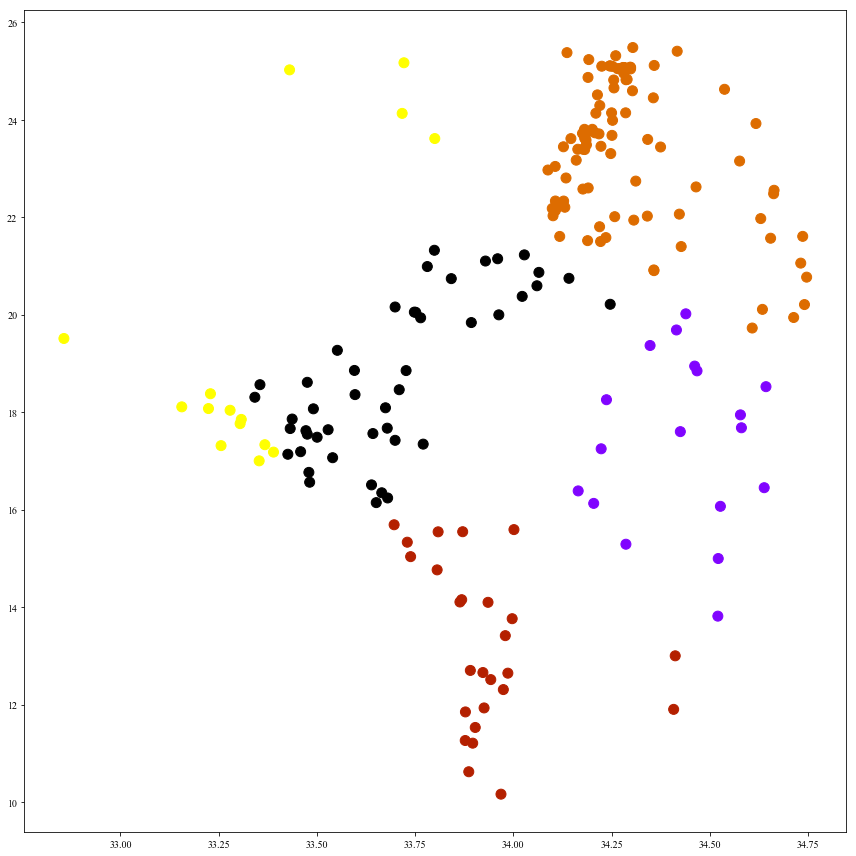

In [5]:
fig2 = plt.figure(figsize = (12,12))

palette = plt.get_cmap('gnuplot', np.max(clusters))
plt.scatter(sub['S'].values, sub['theta'].values, s = 100,c=sub['cluster'].values, cmap = palette)